In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv('/content/sample_data/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


In [ ]:
# Basic info and statistics
print("Dataset Info:")
df.info()

# Drop the CustomerID as it's just an identifier and not useful for clustering
# 2. Drop CustomerID and Encode Gender
df = df.drop('CustomerID', axis=1, errors='ignore')
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df = df.rename(columns={'Gender_Male': 'Is_Male'})

print("\nDescriptive Statistics:")

print("---------------------")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Descriptive Statistics:
---------------------
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000            

In [ ]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Is_Male'], dtype='object')

**Income-to-Age ratio** → higher ratio might mean wealthier young customers

In [ ]:
df['Income_Age_Ratio'] = df['Annual Income (k$)'] / df['Age']

**Normalized Spending** → spending relative to income

In [ ]:
df['Spending_per_Income'] = df['Spending Score (1-100)'] / df['Annual Income (k$)']


In [ ]:
# Select the columns you want to use for clustering (including engineered features)
clustering_features = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income_Age_Ratio', 'Spending_per_Income','Is_Male']

# Scale all relevant features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[clustering_features])

# Convert back to a DataFrame for analysis
df_scaled = pd.DataFrame(scaled_data, columns=clustering_features)


**Univariate Analysis Feature Distributtion**

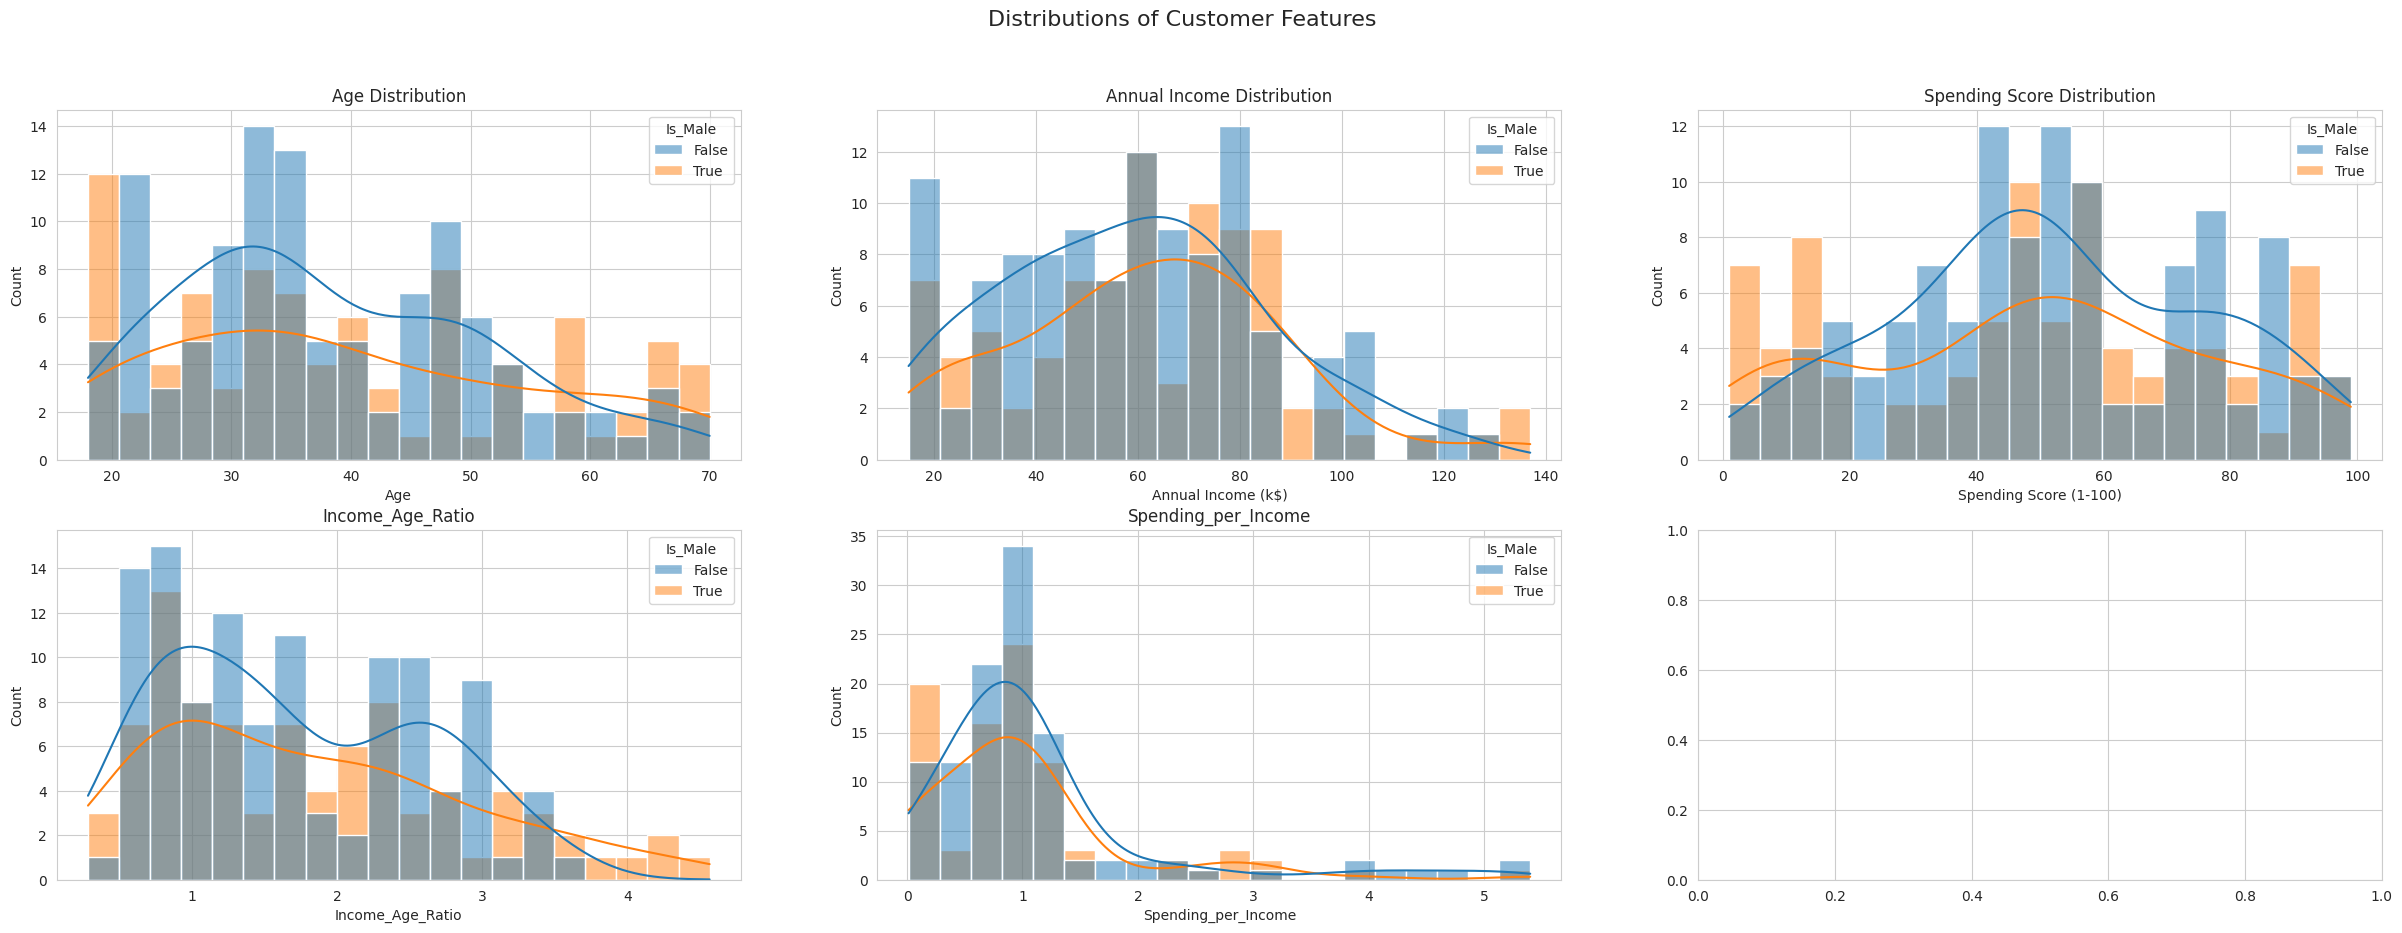

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10))
fig.suptitle('Distributions of Customer Features', fontsize=16)

sns.histplot(ax=axes[0,0], data=df, x='Age', kde=True, bins=20, hue='Is_Male').set_title('Age Distribution')
sns.histplot(ax=axes[0,1], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Is_Male').set_title('Annual Income Distribution')
sns.histplot(ax=axes[0,2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Is_Male').set_title('Spending Score Distribution')
sns.histplot(ax=axes[1,0], data=df, x='Income_Age_Ratio', kde=True, bins=20, hue='Is_Male').set_title('Income_Age_Ratio')
sns.histplot(ax=axes[1,1], data=df, x='Spending_per_Income', kde=True, bins=20, hue='Is_Male').set_title('Spending_per_Income')
plt.show()

This is an **excellent, detailed, and accurate summary** of your Exploratory Data Analysis (EDA). It clearly sets the stage for your customer segmentation.

The only required correction is a technical detail regarding the skewness of the Income-to-Age Ratio, which we identified previously.

Here is the **fully corrected and polished version** of your EDA insights, ready to be added to your notebook.

---

## 📊 Key Insights from Exploratory Data Analysis (EDA)

### 🧓 1️⃣ Age Distribution
* **Observations:**
    * Strong concentration between **20–40 years**, suggesting most customers are young adults.
    * Females have slightly higher counts in the **25–35** range; males show a more even spread.
    * Few customers are above 60.
* **🔍 Insight:** Your customer base is predominantly **young**, and while gender balance is roughly even, the most active demographic cohort skews toward young females.

### 💰 2️⃣ Annual Income Distribution
* **Observations:**
    * The distribution is **right-skewed**, meaning most customers earn **below 80k** annually.
    * Female customers are slightly more frequent in the **lower income brackets (20–60k)**.
    * Male customers dominate slightly in the **higher income ranges (>80k)**.
* **🔍 Insight:** Income diversity exists, but the majority of the customer base is **middle-income**. The higher-earning individuals tend to be disproportionately male.

### 🛍️ 3️⃣ Spending Score Distribution
* **Observations:**
    * The distribution is **bimodal**, with peaks around **40–50 (Moderate)** and **70–80 (High Spenders)**.
    * Female customers exhibit higher densities in the upper spending range, indicating greater engagement or spending enthusiasm.
* **🔍 Insight:** The market naturally consists of **two core personas** (value/moderate vs. premium/high spenders). Females are the **primary drivers of the higher spending segment**.

### 📊 4️⃣ Income-to-Age Ratio Distribution
* **Observations:**
    * **CORRECTED:** The ratio is **right-skewed (or positively skewed)**, with the majority of customers clustered between $0.5–2.5$.
    * The **long tail on the right** is caused by a small group of **young, high-income outliers**.
* **🔍 Insight:** The strong positive skew highlights a small group of **young, affluent outliers** whose income significantly outpaces their age. This small cohort represents **high-potential targets** for premium offers.

### 💸 5️⃣ Spending-per-Income Distribution
* **Observations:**
    * This variable is **right-skewed**—most customers have a low spending-to-income ratio $(<1.5)$.
    * A few outliers (ratios $>3$) suggest overspenders relative to their income.
    * Females again show slightly higher ratios overall.
* **🔍 Insight:** Most customers spend proportionally to their income. The high ratio outliers are **hyper-engaged, high-risk/high-reward** customers that are useful for identifying loyalty segments that are highly influenced by emotion or impulse.

**Bivariate Analysis**

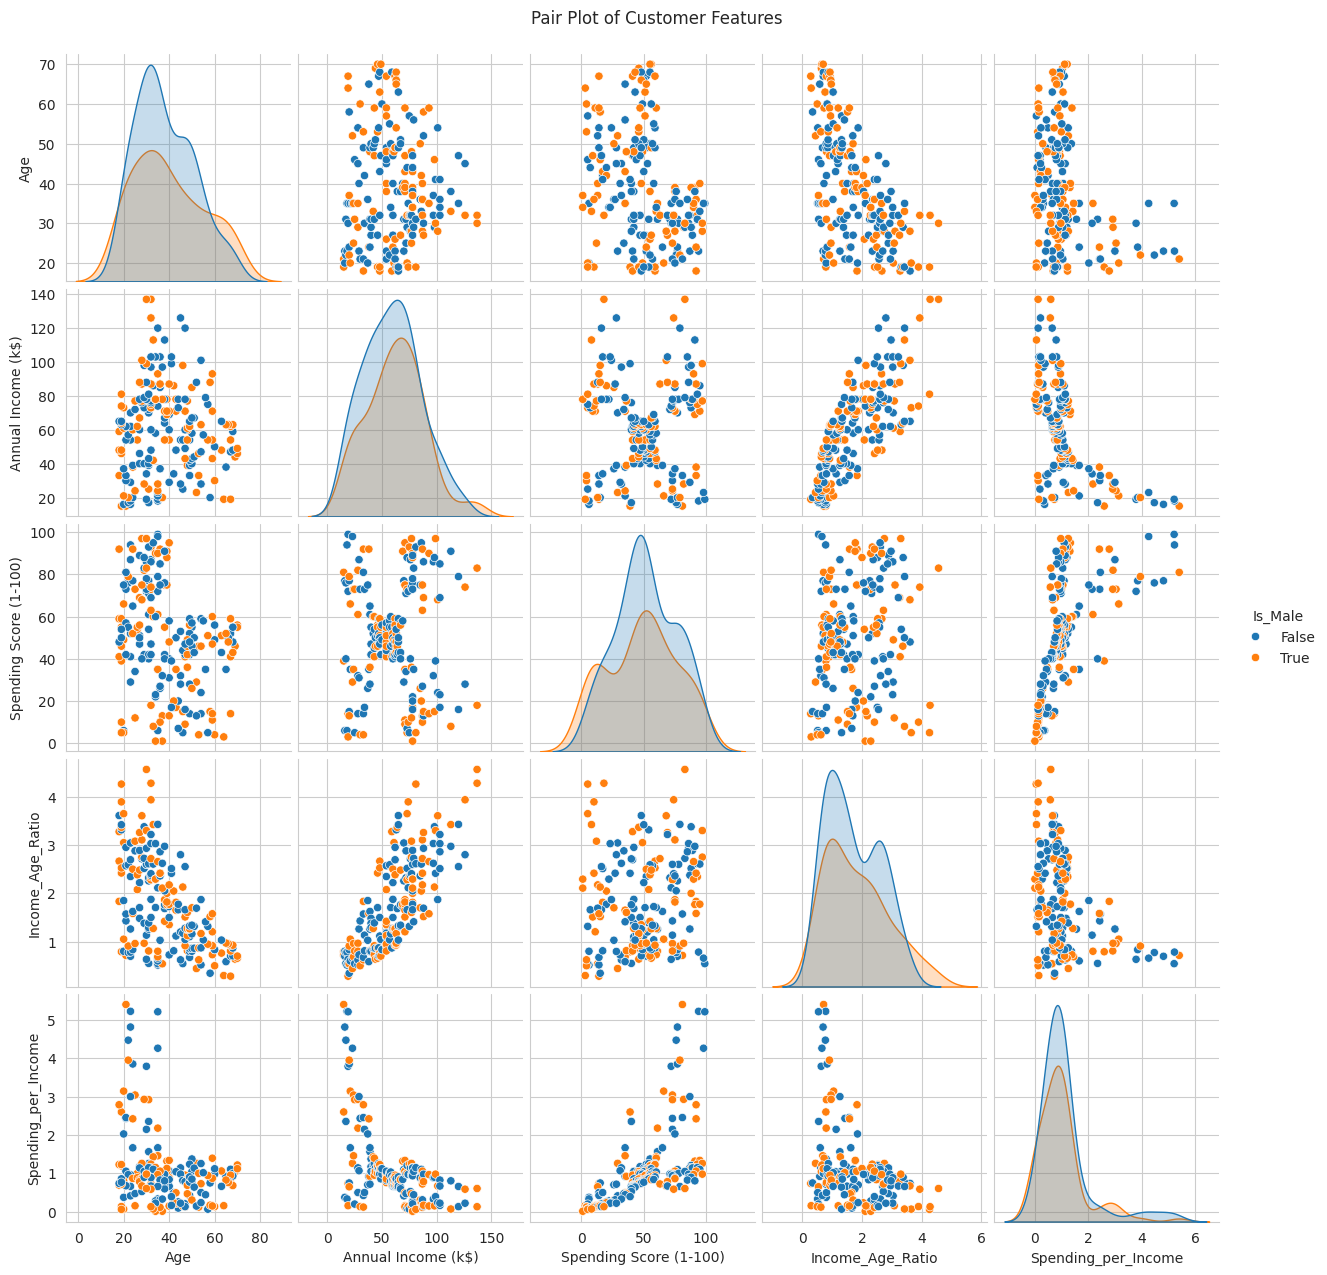

In [ ]:
# Using pairplot to visualize relationships between all numerical variables
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income_Age_Ratio', 'Spending_per_Income'], hue='Is_Male', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

🧓 1️⃣ Age vs Other Features
➤ Age vs Annual Income

There is no strong linear relationship between age and income — customers across all age groups have a wide range of incomes.

Younger customers (20–35) are spread throughout all income levels, while very few older customers earn high incomes.

📊 Insight:
Income is not solely dependent on age in this dataset; young and middle-aged groups exhibit diverse income levels, suggesting various career stages or family backgrounds.

➤ Age vs Spending Score

Younger customers tend to have higher spending scores, while spending generally decreases as age increases.

Female customers show slightly higher spending scores at younger ages compared to males.

📊 Insight:
Spending behavior declines with age, indicating that younger customers are more active and engaged spenders.

➤ Age vs Income-to-Age Ratio

As expected, the ratio drops with age — younger customers have high ratios due to smaller denominators (Age) and similar income levels.

The relationship is strongly inverse and nonlinear, confirming the feature behaves as intended.

📊 Insight:
The Income-to-Age Ratio effectively captures young high earners; this feature is valuable for clustering young affluent customers separately.

➤ Age vs Spending per Income

Younger individuals show higher variability — some spend a lot relative to income, while older customers spend proportionally less.

Females again tend to have slightly higher ratios, reinforcing higher relative spending.

📊 Insight:
Younger customers are less financially conservative and may represent impulsive or aspirational spenders.

💰 2️⃣ Annual Income Relationships
➤ Income vs Spending Score

The scatter shows two clear clusters — one around moderate spenders with medium income and another around high spenders with mid-to-high income.

Spending is not linearly correlated with income; high income does not necessarily mean high spending.

📊 Insight:
Customers with similar income levels behave differently in spending, reinforcing that income alone doesn’t determine spending habits.

➤ Income vs Income-to-Age Ratio

A strong positive relationship — as income increases, so does the ratio.

This confirms that the engineered ratio is mainly driven by income differences among similar age groups.

📊 Insight:
High-income customers naturally appear as high-ratio individuals, validating this feature’s interpretive strength.

➤ Income vs Spending per Income

The plot shows no clear linear correlation; spending per income varies widely even for similar income levels.

Some lower-income customers have high spending ratios, indicating financially stretched or aspirational consumers.

📊 Insight:
There are distinct spending behaviors across income levels — some customers maximize discretionary spending despite limited income.

🛍️ 3️⃣ Spending Behavior Patterns
➤ Spending Score vs Spending per Income

There is a positive relationship — customers with higher spending scores tend to have higher spending-per-income ratios.

This relationship is slightly stronger for females.

📊 Insight:
Spending Score validates the Spending per Income feature — both capture similar behavioral tendencies but from different perspectives.

📈 4️⃣ Gender Differences Overview

Overall, both genders follow similar trends, but females (orange) tend to:

Spend more relative to income.

Have higher spending scores in younger age brackets.

Show slightly more variation in Income-to-Age Ratio at lower ages.

📊 Insight:
Females generally exhibit higher spending engagement and variability, aligning with earlier distributional findings.

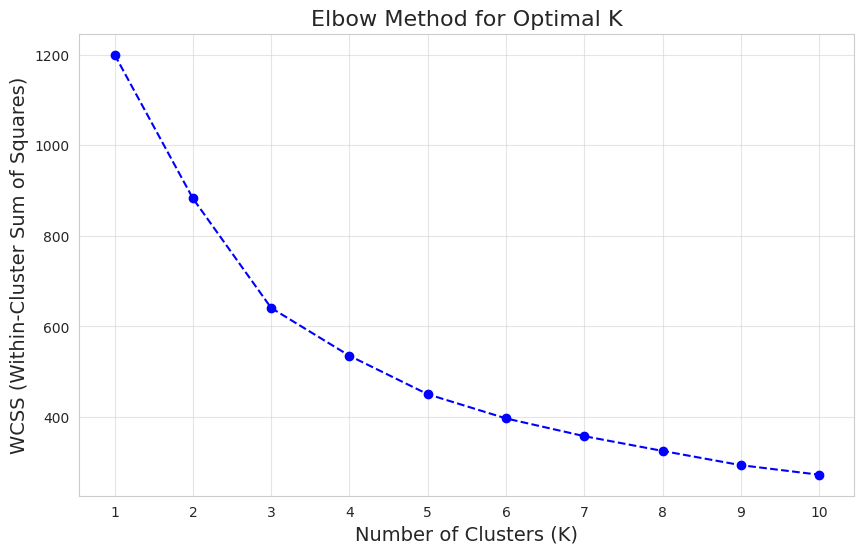

In [ ]:


# --- Elbow Method ---
wcss = []
# Test K from 1 up to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# --- Plotting the Elbow Curve ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.xticks(range(1, 11))
plt.grid(True, alpha=0.5)
plt.show()

In [ ]:
# Assuming optimal K is 5 (adjust if the Elbow plot suggests a different number)
K_OPTIMAL = 5
kmeans = KMeans(n_clusters=K_OPTIMAL, init='k-means++', random_state=42, n_init=10)

# Assign cluster labels back to the original (unscaled) dataframe for interpretation
df['Cluster_Label'] = kmeans.fit_predict(df_scaled)

In [ ]:
# Calculate the mean of key features for each cluster
cluster_profile = df.groupby('Cluster_Label')[['Age', 'Annual Income (k$)',
                                               'Spending Score (1-100)', 'Is_Male']].mean()

# Rename the Gender column for clearer interpretation (0.4 means 40% are Male)
cluster_profile = cluster_profile.rename(columns={'Is_Male': 'Proportion_Male'})

# Print the profiles to interpret the segments
print(cluster_profile)


                     Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster_Label                                                          
0              25.250000           24.916667               76.041667   
1              46.230769           47.826923               41.019231   
2              36.482759           89.517241               18.000000   
3              29.034483           77.344828               72.034483   
4              54.540541           52.567568               37.351351   

               Proportion_Male  
Cluster_Label                   
0                     0.416667  
1                     0.000000  
2                     0.448276  
3                     0.482759  
4                     1.000000  


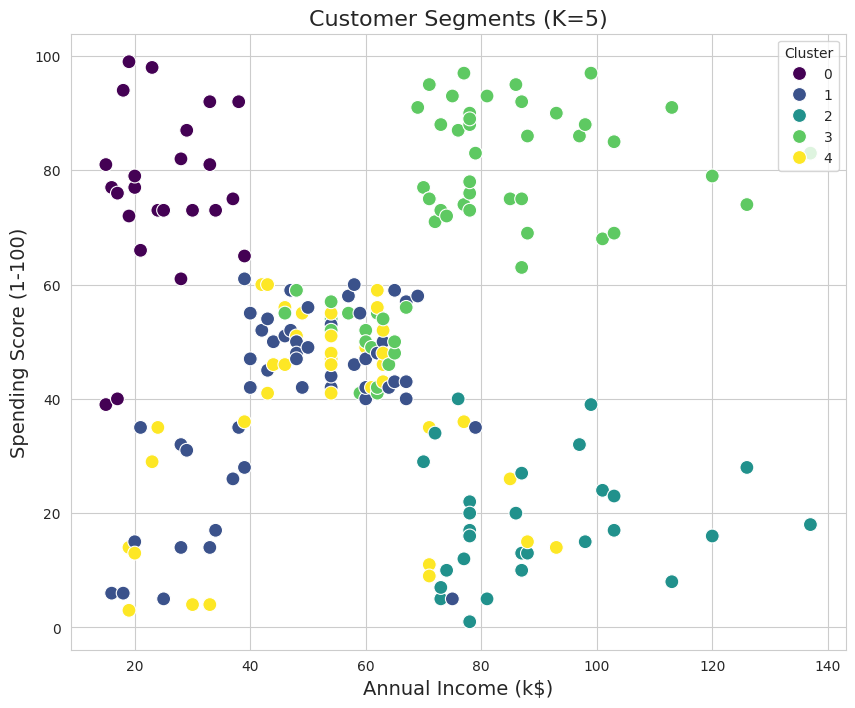

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_Label',
                data=df, palette='viridis', s=100)
plt.title(f'Customer Segments (K={K_OPTIMAL})', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(title='Cluster', loc='upper right')
plt.show()

💡 Business Insights & Actionable Strategies
Based on the 5-cluster segmentation (Income vs. Spending Score), the following strategies are recommended for the mall:

🎯 1. High-Value Spenders (Cluster: High Income, High Spending)
Insight: Your most profitable and engaged customers. They have high purchasing power and are willing to spend it.

Action: Focus on retention and exclusivity. Launch premium loyalty tiers, offer personalized recommendations for new luxury arrivals, and host exclusive, invite-only shopping events.

💼 2. Miserly High Earners (Cluster: High Income, Low Spending)
Insight: They have the money but are highly selective or shop elsewhere. Spending capacity is high, engagement is low.

Action: Target with messaging that justifies the price through quality, durability, and prestige. Use limited-time product launches to create urgency. Do not use generic discounts.

📉 3. Low Income, High Spenders (Cluster: Low Income, High Spending)
Insight: Enthusiastic, impulsive shoppers who are financially volatile. They represent a high volume of transactions but potentially high credit risk.

Action: Focus on frequency and affordability. Promote flash sales, bundled deals, and store-brand value items. Use responsible credit offers or payment plans to manage their spending.

👣 4. Low-Value Shoppers (Cluster: Low Income, Low Spending)
Insight: This is often the youngest segment, shopping only out of necessity. They have the highest potential for future growth.

Action: Focus on conversion and growth. Use small introductory incentives (e.g., "Spend $50, get $10 off") and build long-term brand affinity through social media engagement and budget-friendly promotions.

🌟 5. Middle-of-the-Road (Cluster: Mid Income, Mid Spending)
Insight: Your stable, reliable base. They are predictable and respond well to standard marketing.

Action: Maintain engagement with standard seasonal campaigns (holidays, back-to-school). Focus on cross-selling by introducing them to new product categories they haven't explored yet.